In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# Read the data
train_data_original = pd.read_csv('./Data/fetal_health.csv')

Things to do in this notebook:
1. Examine dataset
2. Examine missing data(which columns, how many)
3. Examine categorical variables(how many, cardinality, etc.)

In [31]:
categorical_var_cols = ['histogram_tendency']
quantitative_var_cols = [col for col in train_data_original.columns if col not in categorical_var_cols]

In [32]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: train_data_original[col].nunique(), categorical_var_cols))
d = dict(zip(categorical_var_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('histogram_tendency', 3)]

### General statistic information of the dataset.

In [33]:
train_data_original.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [34]:
desc = train_data_original.describe()
desc

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Check whether there are empty values in each of the 22 columns.
We could already check that from the table returned by the describe method on the dataframe. This is another method of doing the same thing.

In [35]:
# Number of missing values in each column of training data
missing_val_count_by_column = (train_data_original.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
missing_val_count_by_column

Series([], dtype: int64)


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

The dataset is easy to work with, no missing values therefore we don't have to bother with imputation.

Examining the types of the data variables.

In [36]:
train_data_original.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

##### Feature selection
1. Examine correlation

In [37]:
correlation_matrix = train_data_original.corr()

In [38]:
correlation_matrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<AxesSubplot:>

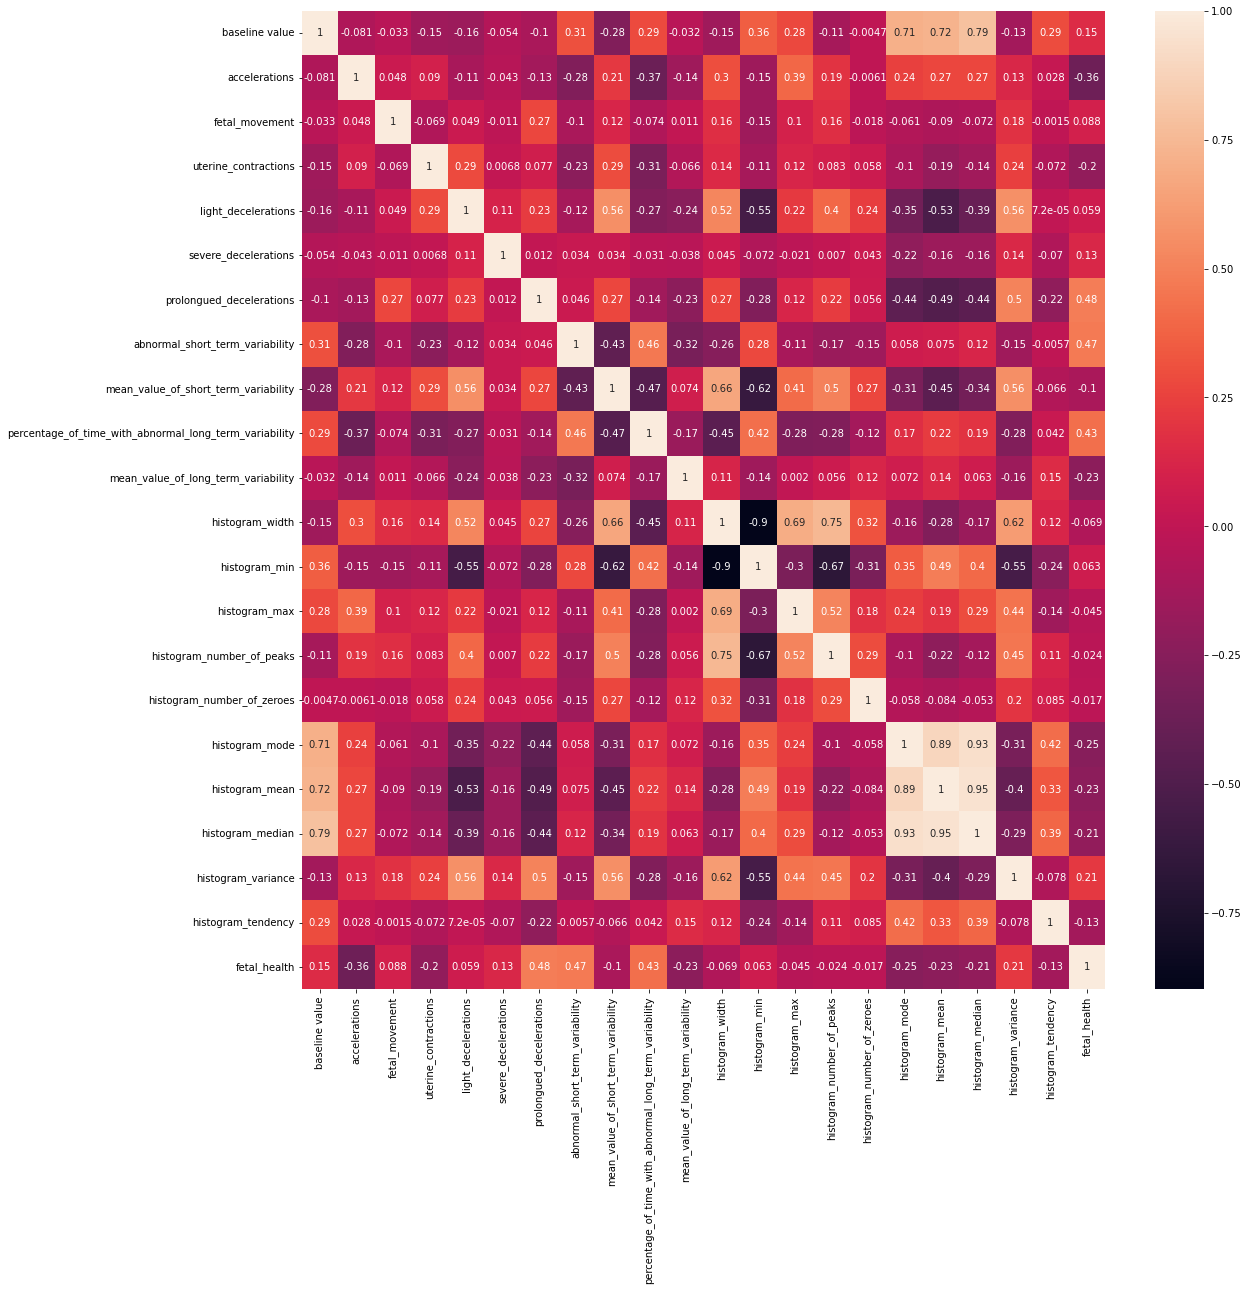

In [39]:
plt.subplots(figsize = (18, 18))
sns.heatmap(correlation_matrix, annot = True)

In [40]:
high_corr_features=set()
for col in range(len(correlation_matrix.columns)):
    for row in range(col):
        if abs(correlation_matrix.iloc[col,row])>0.6:
            name = correlation_matrix.columns[col]
            high_corr_features.add(name)

# These will be dropped.
high_corr_features

{'histogram_max',
 'histogram_mean',
 'histogram_median',
 'histogram_min',
 'histogram_mode',
 'histogram_number_of_peaks',
 'histogram_variance',
 'histogram_width'}

The above columns exhibit high correlation therefore will be dropped

<AxesSubplot:>

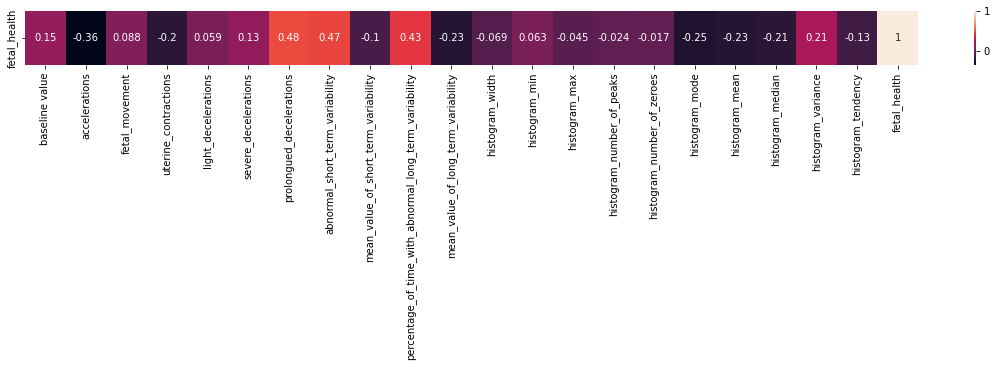

In [41]:
correlations_target_features = correlation_matrix[21:22]
plt.subplots(figsize = (20, 1))
sns.heatmap(correlations_target_features, annot=True)

In [55]:
X_for_corr_selection = train_data_original.copy()
X_for_corr_selection.drop(['fetal_health'], axis=1, inplace=True)

for col in high_corr_features:
    X_for_corr_selection.drop(col, axis=1, inplace=True)

There are some features exhbiting relatively greater correlation with the target as shown above.

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

X_for_KBest = train_data_original.copy()
y_for_KBest = X_for_KBest.fetal_health
X_for_KBest.drop(['fetal_health'], axis=1, inplace=True)

select_byFs=SelectKBest(f_classif, k=15)
select_byFs.fit(X_for_KBest,y_for_KBest)
X_for_KBest = select_byFs.transform(X_for_KBest)

In [69]:
select_byFs.scores_

array([140.62107554, 196.02752286,  11.67979674,  93.71574343,
        66.8647544 ,  28.44815599, 505.85320559, 343.82041888,
       119.88200625, 345.15638463,  70.17409253,  55.08824088,
        87.34050293,   2.46492257,  12.10483413,   2.19637321,
       275.11769592, 297.62549657, 248.77223747, 150.79684904,
        44.54229403])

<BarContainer object of 21 artists>

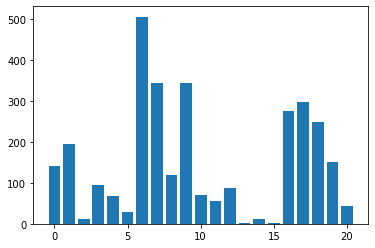

In [70]:
plt.bar([i for i in range(len(select_byFs.scores_))], select_byFs.scores_)

In [82]:
print("Original data dimensionality: ", train_data_original.shape)
print("After KBest data dimensionality: ", X_for_KBest.shape)
print("After correlation selection data dimensionality: ",X_for_corr_selection.shape)

Original data dimensionality:  (2126, 22)
After KBest data dimensionality:  (2126, 15)
After correlation selection data dimensionality:  (2126, 13)


In [78]:
def select_features(training_data, y_training, method):
    """Function for applying feature selection according to a specified method

    Parameters
    ----------
    training_data : dataframe
        The dataframe containing the training data.
        
    y_training : 1-D vector
        The prediction target.
    
    method : string
        The feature selection method to use.

    """
    
    if method == 'correlation':
        corr_matrix = training_data.corr()
        high_corr_features=set()
        for col in range(len(corr_matrix.columns)):
            for row in range(col):
                if abs(corr_matrix.iloc[col,row])>0.6:
                    name = corr_matrix.columns[col]
                    high_corr_features.add(name)
                    
        for col in high_corr_features:
            training_data.drop(col, axis=1, inplace=True)
        return training_data, corr_matrix
    
    if method=='KBest':
        select_byFs=SelectKBest(f_classif, k=5)
        select_byFs.fit(training_data,y_training)
        training_data=select_byFs.transform(training_data)
        return training_data, select_byFs

In [79]:
train_data_feat_sel = train_data_original.copy()
y=train_data_feat_sel.fetal_health
train_data_feat_sel.drop(["fetal_health"], axis=1, inplace=True)

train_data, fs = select_features(train_data_feat_sel,y,method="KBest")
fs.scores_

array([140.62107554, 196.02752286,  11.67979674,  93.71574343,
        66.8647544 ,  28.44815599, 505.85320559, 343.82041888,
       119.88200625, 345.15638463,  70.17409253,  55.08824088,
        87.34050293,   2.46492257,  12.10483413,   2.19637321,
       275.11769592, 297.62549657, 248.77223747, 150.79684904,
        44.54229403])

In [81]:
train_data.shape

(2126, 5)